In [101]:
#Importing the required libraries
from silo_to_yt import make_snapshots, get_ds
import yt
import numpy as np
import os
from make_movies import make_movies

yt.set_log_level("ERROR")

cwd = os.getcwd()

In [102]:
data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064/"
data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n128/"

# Get the list of silo files
evolution = make_snapshots(data_path)


WR140_hydro_cool_covert_d3l6n128
Simulation Info: 6 levels
Shape of evolution array: (203, 6)


In [110]:
ds = get_ds(evolution[0])
ds

StreamDataset: AMRGridData

list

In [48]:
def get_ts(**kwargs):
    os.chdir(data_path)
    ds_list = []

    start = kwargs.get('start', 1)
    end = kwargs.get('end', 10)
    step = kwargs.get('step', 1)

    # Load the desired snapshots
    for i in range(start, end, step):
        ds_list.append(get_ds(evolution[i]))

    print("Number of datasets: ", len(ds_list))
    
    os.chdir(cwd)
    # Create time series object
    return yt.DatasetSeries(ds_list)
    del ds_list

In [50]:
# ts = get_ts(start=100, end=125, step=5)

# # Get list of fields
# fields = ts[0].field_list
# print("\nList of fields: ", fields)


In [51]:
ds = get_ds(evolution[200])

In [52]:
ds.field_list

[('gas', 'density'),
 ('gas', 'temperature'),
 ('gas', 'velocity_x'),
 ('gas', 'velocity_y'),
 ('gas', 'velocity_z')]

# Volume Rendering

In [53]:
img_dir = os.path.join(cwd, "yt_images/VolumeRenders")

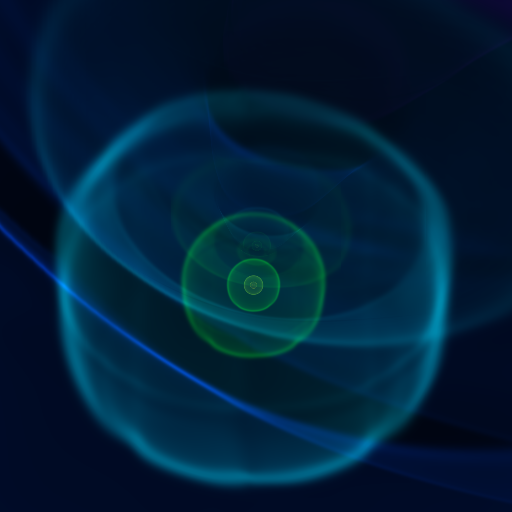

In [65]:

# cam = sc.camera
# cam.switch_orientation(normal_vector=[1, 1, 0], north_vector=[0, 1, 0])
# cam.zoom(4)
# # sc.annotate_axes()
# sc.show()

<Color Transfer Function Object>:
x_bounds:[-18, -12] nbins:256 features:
	('gaussian', 'location(x):-18', 'width(x):0.04', 'height(y):(0.096, 0.025, 0.55, 0.001)')
	('gaussian', 'location(x):-17', 'width(x):0.04', 'height(y):(0.43, 0.00083, 0.66, 0.004)')
	('gaussian', 'location(x):-16', 'width(x):0.04', 'height(y):(0.7, 0.17, 0.56, 0.016)')
	('gaussian', 'location(x):-14', 'width(x):0.04', 'height(y):(0.88, 0.39, 0.39, 0.063)')
	('gaussian', 'location(x):-13', 'width(x):0.04', 'height(y):(0.99, 0.64, 0.22, 0.25)')
	('gaussian', 'location(x):-12', 'width(x):0.04', 'height(y):(0.95, 0.95, 0.15,   1)')



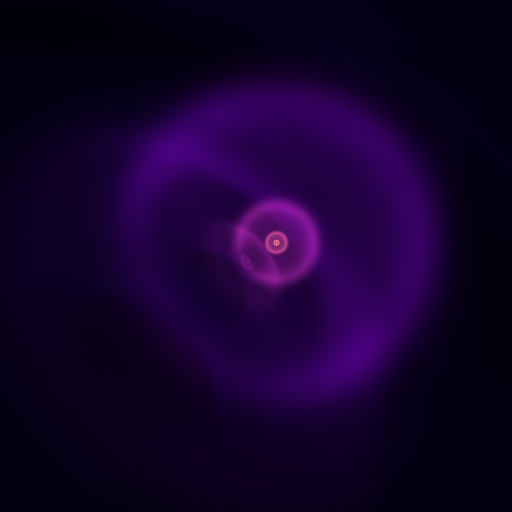

In [100]:
sc = yt.create_scene(ds)

source = sc[0]
source.set_field('density')
source.set_log(True)

# building transfer function
bounds = (1e-18, 1e-12)
tf = yt.ColorTransferFunction(x_bounds=np.log10(bounds))

# tf.add_gaussian(location=-14, width=0.07, height=[1,0,0,2])
# tf.add_gaussian(location=-15.2, width=0.07, height=[0.5,1,1,0.5])

tf.add_layers(5, w=0.04, colormap='plasma')
print(tf)

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot(os.path.join(img_dir, 'wr140_tf_density.png'), profile_field='density')

cam = sc.camera
cam.zoom(3)

sc.render()
sc.show()
